## 01. Importing Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## 02. Importing Data

In [2]:
df_wrangled = pd.read_csv(r'/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis/02 Data/Prepared Data/df_wrangled.csv', index_col = False)

In [3]:
path = r'/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis'

In [4]:
df_wrangled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_wrangled.csv'), index_col = False)

## 03. Exploring Data

In [5]:
df_wrangled.head(5)

,Unnamed: 0,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Total Number of Views Last 7 Days
0,0,EUR 61713,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.10,2.50,GRP,Germany Â» Lake Constance Â» Lindau/Bodensee,110
1,1,CHF 72700,Bowrider,Tahoe power boats,"new boat on order,Unleaded",2021,6.40,2.55,GRP,Switzerland Â» Lake of Zurich Â» Horgen,205
2,2,CHF 84329,Sport Boat,Regal power boats,"new boat from stock,Unleaded",2021,6.40,2.50,GRP,Switzerland Â» Lake of Zurich Â» Altendorf,128
3,3,CHF 96856,Sport Boat,Regal power boats,"new boat from stock,Unleaded",2021,6.25,2.50,GRP,Switzerland Â» Lake of Zurich Â» Altendorf,218
4,4,CHF 102168,Bowrider,Chaparral power boats,"new boat on order,Unleaded",2021,7.01,2.59,GRP,Switzerland Â» Lake Constance Â» Gottlieben,312


## Question 2: Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis. For instance, discard “ID,” “date,” and “index” variables.

In [6]:
# Total Number of Views Last 7 Days - Price - Manufacturer

## Question 3: Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [7]:
# Create a correlation matrix using pandas

df_wrangled.corr()

,Unnamed: 0,Year Built,Length,Width,Total Number of Views Last 7 Days
Unnamed: 0,1.000000,-0.423768,0.115695,0.085705,0.107779
Year Built,-0.423768,1.000000,0.117290,0.127150,0.024808
Length,0.115695,0.117290,1.000000,0.873093,-0.135011
Width,0.085705,0.127150,0.873093,1.000000,-0.157547
Total Number of Views Last 7 Days,0.107779,0.024808,-0.135011,-0.157547,1.000000


In [8]:
# 0: no relationship
# 0.1–0.3: weak relationship
# 0.3–0.5: moderate relationship
# 0.5–1.0: strong relationship

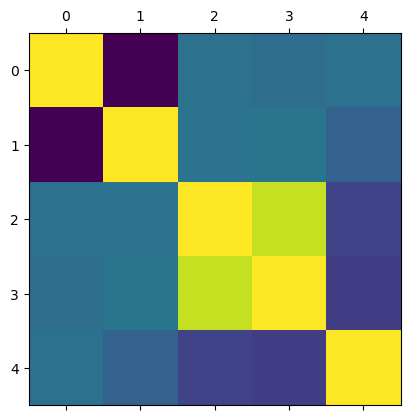

In [9]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_wrangled.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

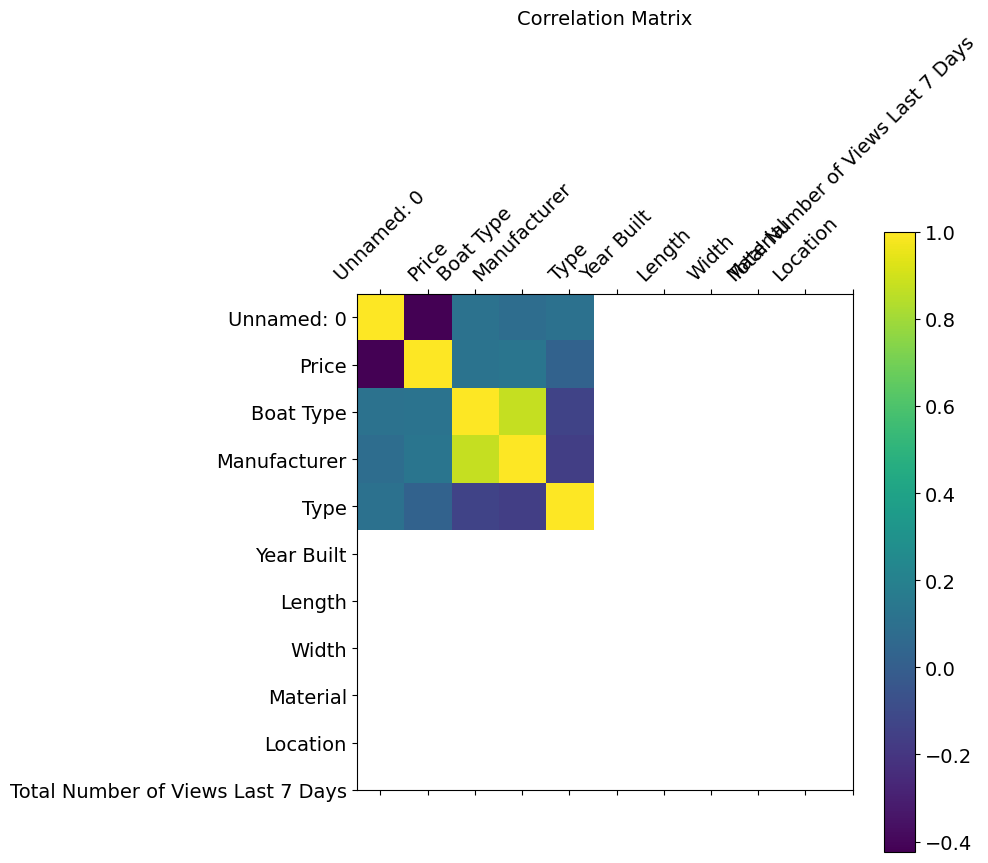

In [10]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_wrangled.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_wrangled.shape[1]), df_wrangled.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_wrangled.shape[1]), df_wrangled.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## Question 4: Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.Discuss the output in a markdown cell.

In [11]:
# Year Built - Length - Width - Have the strongest correlations

In [12]:
# Create a subset excluding the "Unnamed" column

sub = df_wrangled[['Year Built','Length','Width','Total Number of Views Last 7 Days','Price']]

In [13]:
sub

,Year Built,Length,Width,Total Number of Views Last 7 Days,Price
0,2021,6.10,2.50,110,EUR 61713
1,2021,6.40,2.55,205,CHF 72700
2,2021,6.40,2.50,128,CHF 84329
3,2021,6.25,2.50,218,CHF 96856
4,2021,7.01,2.59,312,CHF 102168
...,...,...,...,...,...
9883,0,6.50,2.45,550,CHF 5000
9884,0,4.11,1.73,280,CHF 4990
9885,0,4.01,1.64,247,CHF 4980
9886,0,3.99,1.52,150,CHF 4950


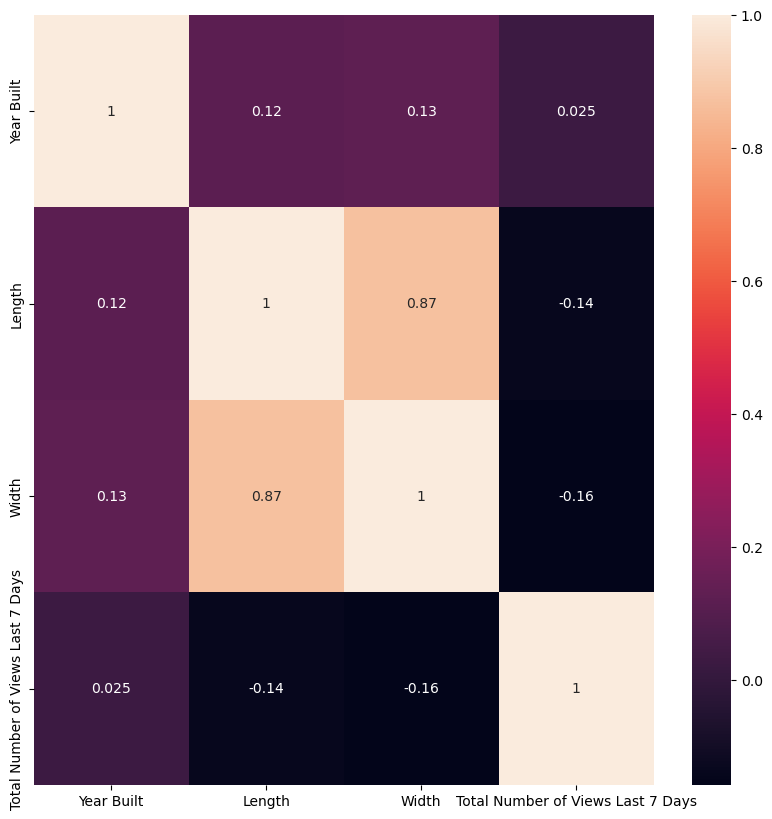

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [30]:
# save correlation map as image
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'correlation.png'))

In [15]:
#create scatterplot of between year built and length variables

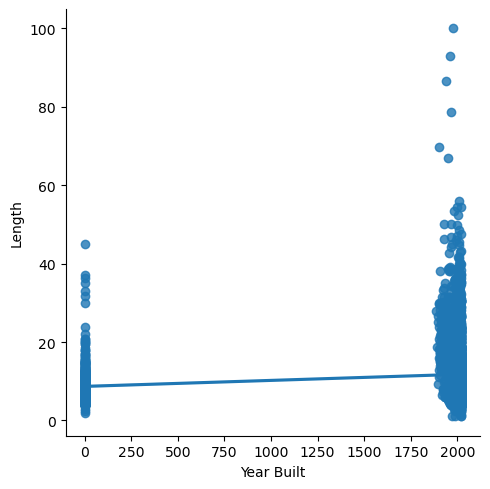

In [16]:
# Create a scatterplot for the "year built" and "length" columns in seaborn

sns.lmplot(x = 'Year Built', y = 'Length', data = sub)

### A weak positive correlation between these two variables. As the year built increases, the length of the property tends to increase slightly.  The relationship is not particularly strong. A strong prediction about the length of a property based solely on the year it was built cannot be made.


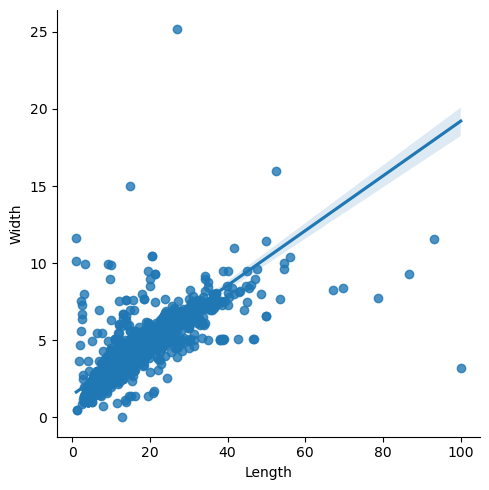

In [17]:
# Create a scatterplot for the "Length" and "Width" columns in seaborn

sns.lmplot(x = 'Length', y = 'Width', data = sub)

### a strong positive correlation between these two variables. these two variables are highly related

## Question 5: Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [18]:
# Year Built - Length - Width - Price - Total Number of Views Last 7 Days

In [19]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Year Built', 'Length', 'Width', 'Price','Total Number of Views Last 7 Days']]

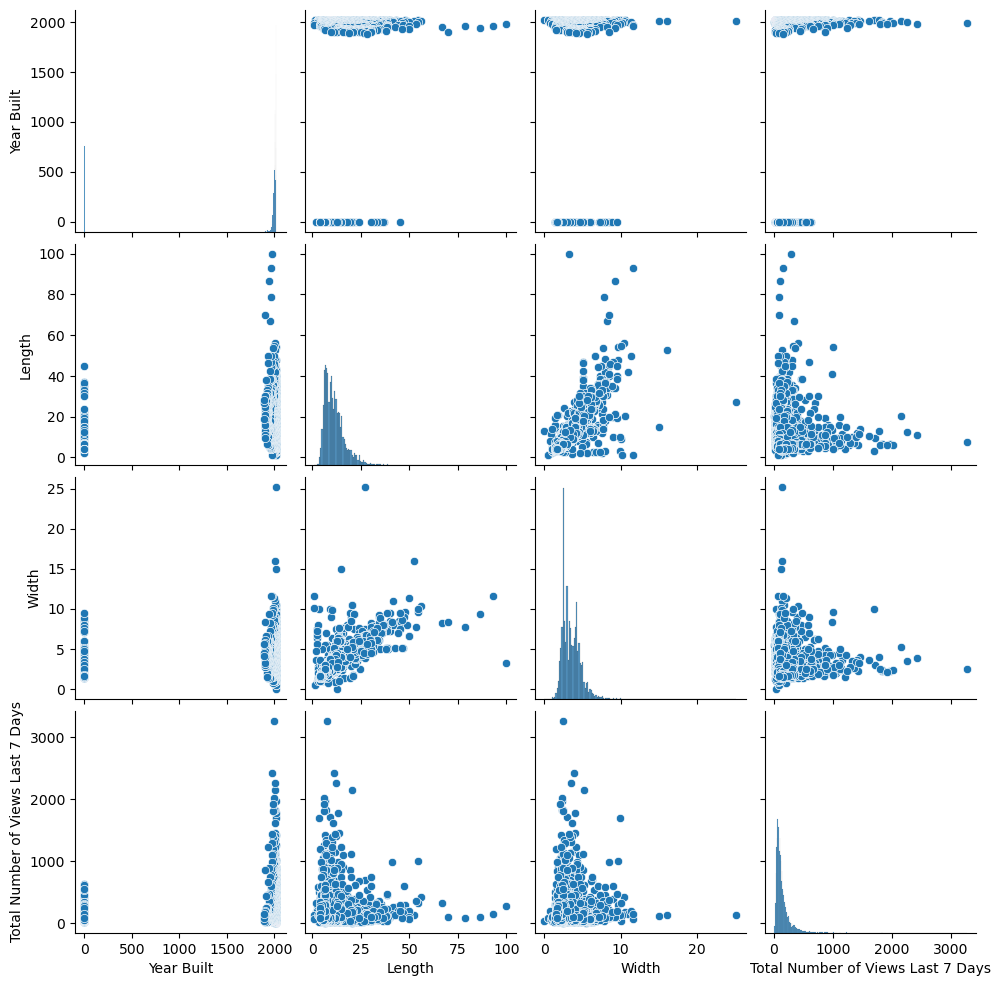

In [20]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### When looking at pair plots - I can see there is a strong correlation betwen length and width. We can see a few outliers such as in Total Number of Views Last 7 Days and Year Built - where over 3,000 views were given to a boat in the year 2000+. I would like to explore further into the Total Number of Views and Length variables as I see very strong correlation there. The same with the Total Number of Views and Width. It seems customers may be considering these the top deciding factors in buying a boat.

## Question 6: Create a categorical plot and interpret the results.

### Creating a categorical variable that splits the "Length" column into categories

<AxesSubplot:xlabel='Length', ylabel='Count'>

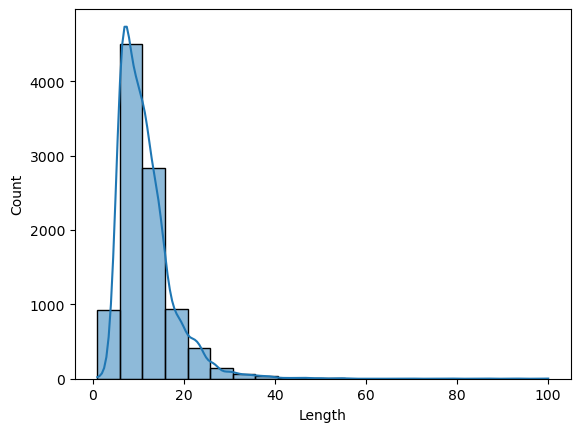

In [21]:
sns.histplot(df_wrangled['Length'], bins = 20, kde = True)

In [ ]:
# save hist map as image
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'correlation.png'))

In [22]:
df_wrangled.loc[df_wrangled['Length'] < 26, 'Length Category'] = 'Small'

In [23]:
df_wrangled.loc[(df_wrangled['Length'] >= 26) & (df_wrangled['Length'] < 76), 'Length Category'] = 'Medium'

In [24]:
df_wrangled.loc[df_wrangled['Length'] >= 76, 'Length Category'] = 'Large'

In [25]:
df_wrangled['Length Category'].value_counts(dropna = False)

Small     9616
Medium     259
NaN          9
Large        4
Name: Length Category, dtype: int64

In [26]:
df_wrangled.columns

Index(['Unnamed: 0', 'Price', 'Boat Type', 'Manufacturer', 'Type',
       'Year Built', 'Length', 'Width', 'Material', 'Location',
       'Total Number of Views Last 7 Days', 'Length Category'],
      dtype='object')

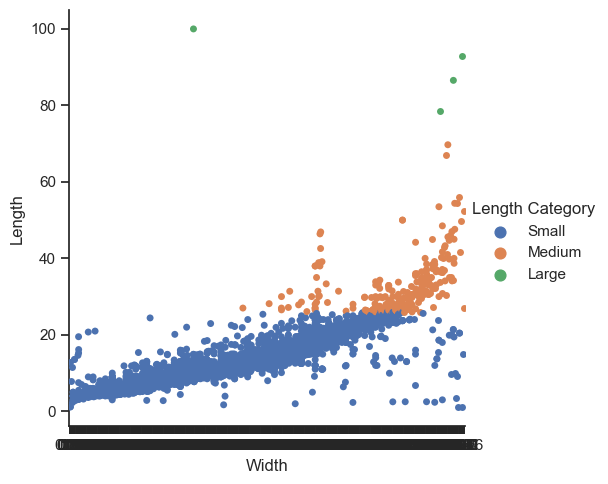

In [27]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Width", y="Length", hue="Length Category", data=df_wrangled)

In [28]:
# fig = g.get_figure()
g.savefig("out.png") 